# Notebook sur la construction du maillage

## Les différentes étapes sont: 
1. Déterminer la forme et la position de l'objet
2. Déterminer le statut de chaque point: Eau, bois, frontière, coin, source 
3. Pour chaque frontière ou coin, calculer la valeur de la normale
4. Déterminer les coefficients de chaque point et construire la matrice A 


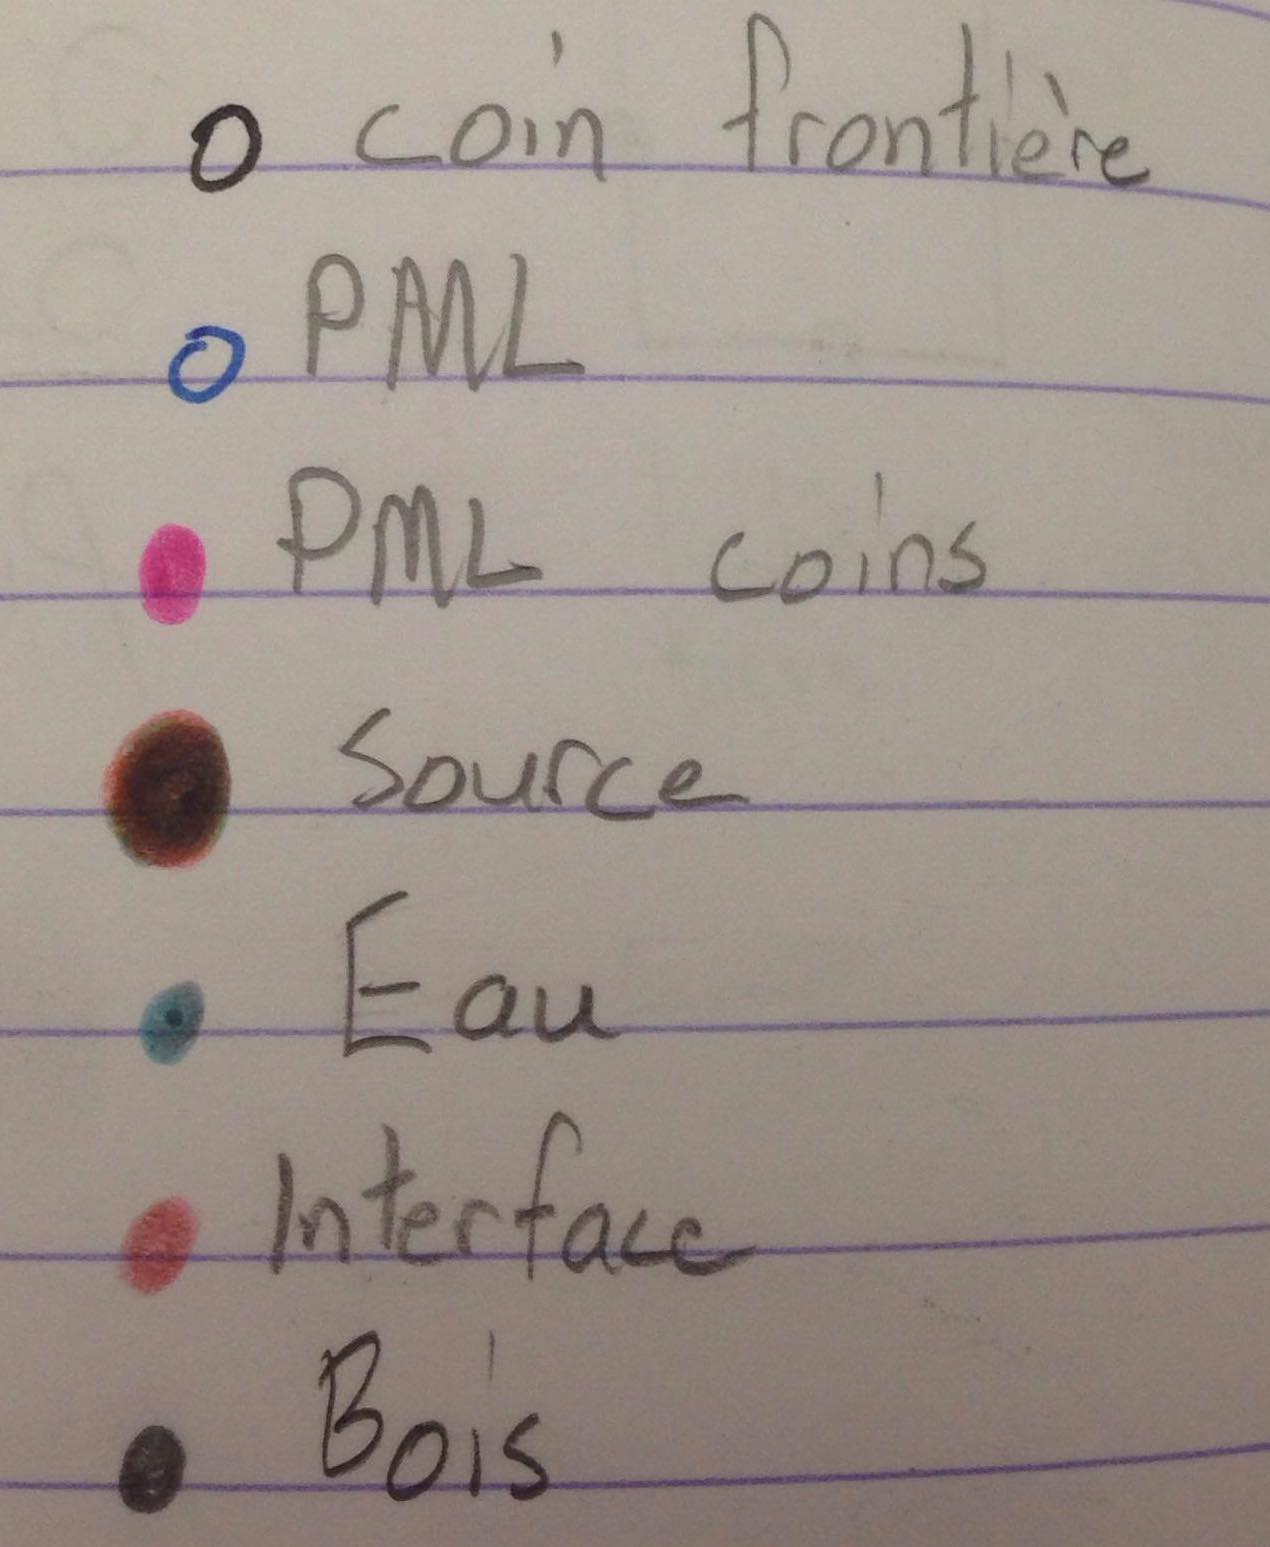

In [361]:
from IPython.display import Image
Image("./Images/LegendGrille.jpg", width=200, height=200)


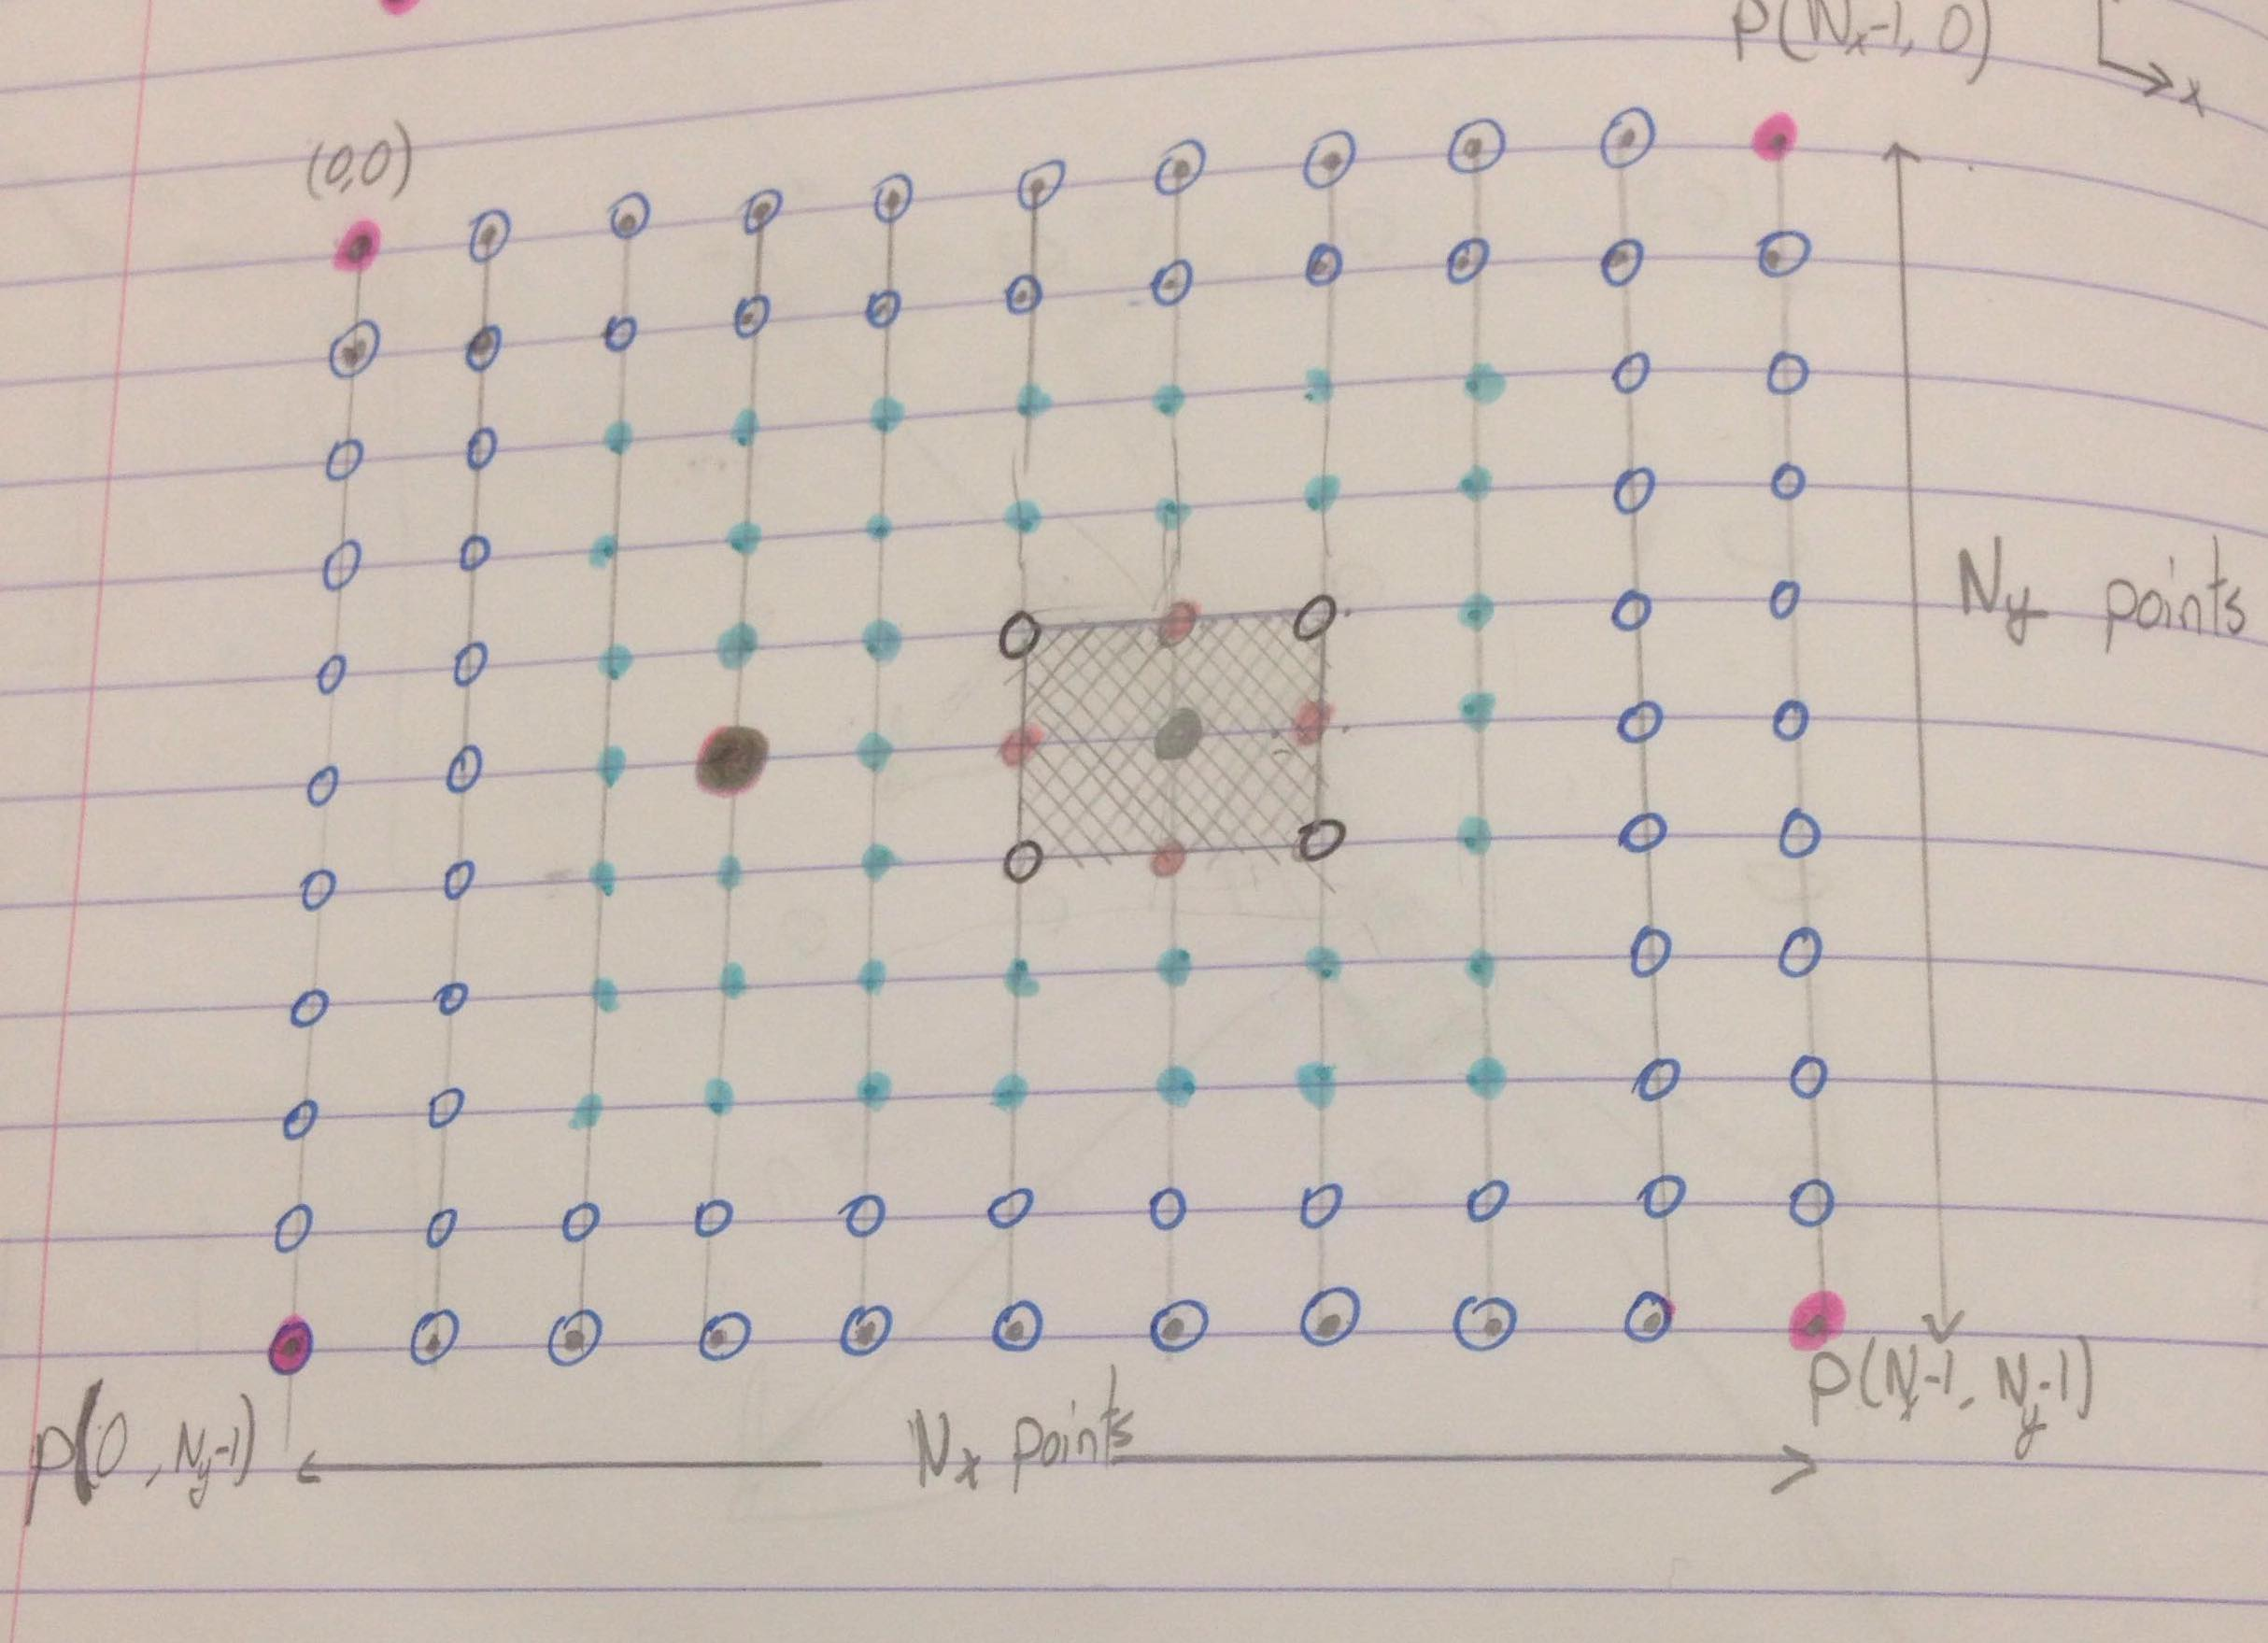

In [362]:
Image("./Images/Grille.jpg", width=400, height=400)

Pour chaque point, une solution générale de la forme suivante peut être trouvée:
$$ap_{i-2,j}+bp_{i-1,j}+cp_{i,j-2}+dp_{i,j-1}+ep_{i,j}+ fp_{i+1,j}+gp_{i+2,j}+hp_{i,j+1}+i p_{i,j+2}=j$$

## Pour un point eau ( cas 1) ou bois (cas 2):
L'équation est: 

$$\rho(\frac{\omega^2}{B}+2i\omega\alpha)p=-\nabla^2 p\implies 0=\nabla^2 p +k^2 p$$

La discrétisation mène à: 
\begin{align}
0&=p_{i-1,j}+p_{i,j-1}-(4-k^2 h^2 )p_{i,j}+p_{i+1,j}+p_{i,j+1}
\end{align}


## Pour un point frontière :
 
L'équation à la frontière est: 
$$\frac{\nabla{p_1}\cdot \hat{n}}{\gamma_1}=\frac{\nabla{p_2}\cdot \hat{n}}{\gamma_2}$$ avec $\gamma_i=\rho_i(\alpha_iB_i+i\omega)$ et 
$\hat{n}=n_x\hat{x}+n_y\hat{y}$ 

où 
$n_x^2+n_y^2=1$

En considérant le milieu 1 comme étant le milieu où le gradient est arrière et le milieu 2 le milieu où le gradient utilise une formule avant, l'équation générale est: 


\begin{align}
\frac{n_x}{\gamma_1}p_{i-2,j}-\frac{4n_x}{\gamma_1}p_{i-1,j}+\frac{n_y}{\gamma_1}p_{i,j-2}-\frac{4n_y}{\gamma_1}p_{i,j-1}+\frac{3(\gamma_1+\gamma_2)(n_x+n_y)}{\gamma_1\gamma_2}p_{i,j}-\frac{4n_x}{\gamma_2}p_{i+1,j}+\frac{n_x}{\gamma_2}p_{i+2,j}-\frac{4n_y}{\gamma_2}p_{i,j+1}+\frac{n_y}{\gamma_2}p_{i,j+2}=&0
\end{align}

Les situations possibles sont:


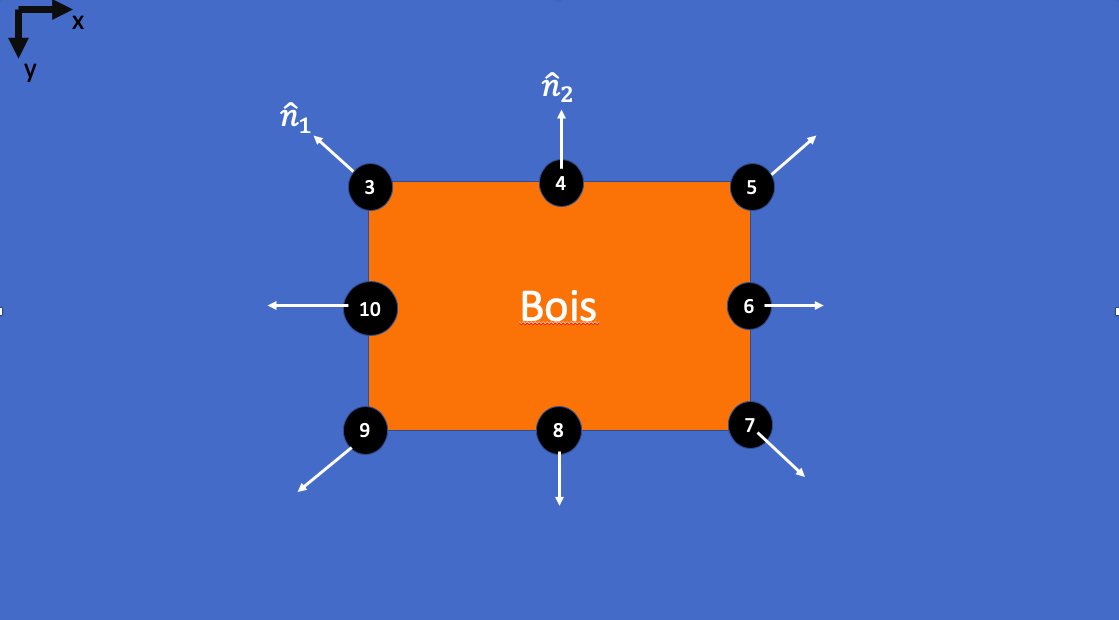

In [355]:
Image("./Images/situations.png", width=500, height=600)

| Situation     | Milieu 1 (arrière)     | Milieu 2 (avant) | $n_x$|$n_y$ |
| ------------- |:-------------:| -----:|----:|----:|
| 3     | Eau    |Bois       |$\frac{-1}{\sqrt{2}}$|$\frac{-1}{\sqrt{2}}$|
|4      | Eau    |Bois    |0|-1|
|5 |   Bois   |  Eau  |$\frac{1}{\sqrt{2}}$|$\frac{-1}{\sqrt{2}}$|
|6 |   Bois   |  Eau  |1|0|
|7|Bois|Eau|$\frac{1}{\sqrt{2}}$|$\frac{1}{\sqrt{2}}$|
|8|Bois|Eau|0|1|
|9|Eau|Bois|$\frac{-1}{\sqrt{2}}$|$\frac{1}{\sqrt{2}}$|
|10|Eau|Bois|-1|0|

## Pour les points PML: 
Il y a les situations suivantes:


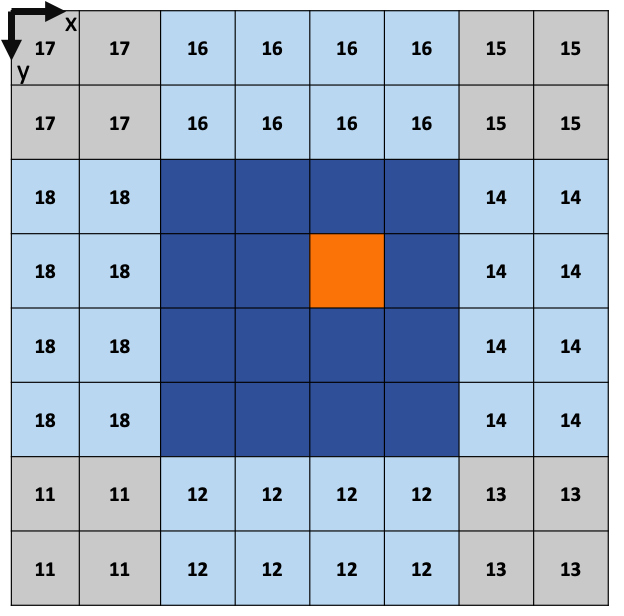

In [356]:
Image("./Images/PML2.png", width=300, height=300)


On considère le point en bas à gauche comme étant le point (0,0).

Il faut traiter les 8 cas. Ces situations mèneront à une relation de la forme: 
$$ap_{i-2,j}+bp_{i-1,j}+cp_{i,j}+dp_{i+1,j}+ep_{i+2,j}+ fp_{i,j-2}+gp_{i,j-1}+hp_{i,j+1}+i p_{i,j+2}=0$$

Les définitions suivantes ont été utilisées: 
\begin{align}\beta_x=&\frac{i}{(x-x_0)(k|x-x_0|+i)}
\end{align}

\begin{align}\gamma_x=&1+\frac{i}{(k|x-x_0|)}
\end{align}
\begin{align}\beta_y=&\frac{i}{(y-y_0)(k|y-y_0|+i)}
\end{align}
\begin{align}\gamma_y=&1+\frac{i}{(k|y-y_0|)}
\end{align}

Ici: 
\begin{align}k^2=\rho(\frac{\omega^2}{B}+2i\omega\alpha)\end{align}

Les cas génèrent les coefficients suivants: 

| Cas| $\partial x$| $\partial y$| $p_{i-2,j}$ | $p_{i-1,j}$ | $p_{i,j-2}$ | $p_{i,j-1} $ |$p_{i,j}$|$p_{i+1,j}$| $p_{i+2,j}$ | $p_{i,j+1}$ | $p_{i,j+2}$ |
| - |:------:|:-----:|:---------:|:---------------|:------------:|:-----------:|:----------:|:-----------:|:----------:|:-----------:|:---------:|
| 11 |Avant|Arrière|0|0|$\frac{1}{\gamma_y^2}$|$\frac{-h\beta_y-2}{\gamma_y^2}$|$\frac{1-h\beta_x}{\gamma_x^2}+\frac{1+h\beta_y}{\gamma_y^2}+k^2h^2$|$\frac{h\beta_x-2}{\gamma_x^2}$|$\frac{1}{\gamma_x^2}$|0|0|
| 12 |Centrée|Arrière|0|1|$\frac{1}{\gamma_y^2}$|$-\frac{2+h\beta_y}{\gamma_y^2}$|$\frac{1+h\beta_y}{\gamma_y^2}-2+k^2h^2$|1|0|0|0|
| 13 |Arrière|Arrière|$\frac{1}{\gamma_x^2}$|$-(\frac{h\beta_x+2}{\gamma_x^2})$ |$\frac{1}{\gamma_y^2}$|$-(\frac{h\beta_y+2}{\gamma_y^2})$|$\frac{1+h\beta_x}{\gamma_x^2}+\frac{1+h\beta_y}{\gamma_y^2}+k^2h^2$|0|0|0|0|
| 14 |Arrière|Centrée|$\frac{1}{\gamma_x^2}$|$-(\frac{2+h\beta_x}{\gamma_x^2})$|$0$|$1$|$\frac{1+h\beta_x}{\gamma_x^2}-2+k^2h^2$|0|0|1|0|
| 15 |Arrière|Avant|$\frac{1}{\gamma_x^2}$|$-(\frac{h\beta_x+2}{\gamma_x^2})$ |$0$|$0$|$\frac{1+h\beta_x}{\gamma_x^2}+\frac{1-h\beta_y}{\gamma_y^2}+k^2h^2$|0|0|$\frac{h\beta_y-2}{\gamma_y^2}$|$\frac{1}{\gamma_y^2}$|
| 16 |Centrée|Avant|0|1|0|0|$\frac{1+h\beta_y}{\gamma_y^2}-2+k^2h^2$|1|0|$\frac{-2+h\beta_y}{\gamma_y^2}$|$\frac{1}{\gamma_y^2}$|
| 17|Avant|Avant|0|0|0|0|$k^2h^2+\frac{1-h\beta_x }{\gamma_x^2}+\frac{1-h\beta_y }{\gamma_y^2}$|$\frac{h\beta_x-2}{\gamma_x^2}$|$\frac{1}{\gamma_x^2}$|$\frac{h\beta_y-2}{\gamma_y^2}$|$\frac{1}{\gamma_y^2}$
| 18 |Avant|Centrée|0|0|$0$|$1$|$\frac{1-h\beta_x}{\gamma_x^2}-2+k^2h^2$|$(\frac{-2+h\beta_x}{\gamma_x^2})$|$\frac{1}{\gamma_x^2}$|1|0|

## Essai avec une table en Html...
<table width="600">
    <tr>
        <td>Cas</td>
        <td>$\partial x$</td>
        <td>$\partial y$</td>
        <td>$p_{i-2,j}$</td width=50>
        <td>$p_{i-1,j}$</td>
        <td>$p_{i,j-2}$</td>
        <td>$p_{i,j-1} $</td>
        <td>$p_{i,j}$</td width=150>
        <td>$p_{i+1,j}$</td>
        <td>$p_{i+2,j}$</td>
        <td>$p_{i,j+1}$</td>
        <td>$p_{i,j+2}$</td>
    </tr>
    <tr>
        <td>11</td>
        <td>Avant</td>
        <td>Arrière</td>
        <td>0</td>
        <td>0</td>
        <td>$\frac{1}{\gamma_y^2}$</td>
        <td>$\frac{-h\beta_y-2}{\gamma_y^2}$</td>
        <td>$\frac{1-h\beta_x}{\gamma_x^2}+\frac{1+h\beta_y}{\gamma_y^2}+k^2h^2$</td>
        <td>$\frac{h\beta_x-2}{\gamma_x^2}$</td>
        <td>$\frac{1}{\gamma_x^2}$</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>12</td>
        <td>Centrée</td>
        <td>Arrière</td>
        <td>0</td>
        <td>1</td>
        <td>$\frac{1}{\gamma_y^2}$</td>
        <td>$-\frac{2+h\beta_y}{\gamma_y^2}$</td width=50>
        <td>$\frac{1+h\beta_y}{\gamma_y^2}-2+k^2h^2$</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>13</td>
        <td>Arrière</td>
        <td>Arrière</td>
        <td>$\frac{1}{\gamma_x^2}$</td>
        <td>$-(\frac{h\beta_x+2}{\gamma_x^2})$</td>
        <td>$\frac{1}{\gamma_y^2}$</td>
        <td>$-(\frac{h\beta_y+2}{\gamma_y^2})$</td>
        <td>$\frac{1+h\beta_x}{\gamma_x^2}+\frac{1+h\beta_y}{\gamma_y^2}+k^2h^2$</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>14</td>
        <td>Arrière</td>
        <td>Centrée</td>
        <td>$\frac{1}{\gamma_x^2}$</td>
        <td>$-(\frac{2+h\beta_x}{\gamma_x^2})$</td>
        <td>$0$</td>
        <td>$1$</td>
        <td>$\frac{1+h\beta_x}{\gamma_x^2}-2+k^2h^2$</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>15</td>
        <td>Arrière</td>
        <td>Avant</td>
        <td>$\frac{1}{\gamma_x^2}$</td>
        <td>$-(\frac{h\beta_x+2}{\gamma_x^2})$</td>
        <td>$0$</td>
        <td>$0$</td>
        <td>$\frac{1+h\beta_x}{\gamma_x^2}+\frac{1-h\beta_y}{\gamma_y^2}+k^2h^2$</td>
        <td>0</td>
        <td>0</td>
        <td>$\frac{h\beta_y-2}{\gamma_y^2}$</td>
        <td>$\frac{1}{\gamma_y^2}$</td>
    </tr>
    <tr>
        <td>16</td>
        <td>Centrée</td>
        <td>Avant</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>$\frac{1+h\beta_y}{\gamma_y^2}-2+k^2h^2$</td>
        <td>1</td>
        <td>0</td>
        <td>$\frac{-2+h\beta_y}{\gamma_y^2}$</td>
        <td>$\frac{1}{\gamma_y^2}$</td>
    </tr>
    <tr>
        <td>17</td>
        <td>Avant</td>
        <td>Avant</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>$k^2h^2+\frac{1-h\beta_x }{\gamma_x^2}+\frac{1-h\beta_y }{\gamma_y^2}$</td>
        <td>$\frac{h\beta_x-2}{\gamma_x^2}$</td>
        <td>$\frac{1}{\gamma_x^2}$</td>
        <td>$\frac{h\beta_y-2}{\gamma_y^2}$</td>
        <td>$\frac{1}{\gamma_y^2}$</td>
    </tr>
    <tr>
        <td>18</td>
        <td>Avant</td>
        <td>Centrée</td>
        <td>0</td>
        <td>0</td>
        <td>$0$</td>
        <td>$1$</td>
        <td>$\frac{1-h\beta_x}{\gamma_x^2}-2+k^2h^2$</td>
        <td>$(\frac{-2+h\beta_x}{\gamma_x^2})$</td>
        <td>$\frac{1}{\gamma_x^2}$</td>
        <td>1</td>
        <td>0</td>
    </tr>
</table>



## Pour un point source (Cas 19):

Ici, il n'est pas très clair ce qu'on doit faire. Instinctivement, il faut «forcer» une pression au point source. 

1. La première option est de dire que la pression au point i,j est la pression de la source ($p_s$) Ainsi, on a $$p_{i,j}=p_s$$

2. Une deuxième option est qu'au point source, l'équation est: 

$$\rho(\frac{\omega^2}{B}+2i\omega\alpha)p=\gamma p=-\nabla^2 p + \rho p_s$$ 
Ainsi, le point $p_{i,j}$ où la source est appliquée, l'équation devient: 
\begin{align}
p_{i-1,j}+p_{i,j-1}-(4-\gamma h^2 )p_{i,j}+p_{i+1,j}+p_{i,j+1}&=h^2\rho p_s
\end{align}


# Construction de la matrice «physique» aka Carte

In [363]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.csc, scipy.sparse.linalg
import time

### Paramètres de la simulation

In [364]:
# Nombre de points en x
Nx=100
#Longueur en x (m)
Lx=20
#Espace entre chaque noeud
dx=(Lx)/(Nx-1)

# Nombre de points en y
Ny=Nx
#Longueur en x (m)
Ly=Lx
#Espace entre chaque noeud
dy=dx

# Épaisseur (en points de la couche de PML)
N_PML=5

# Emplacement du bois
centre_bois_x=40
centre_bois_y=40
# Longueur en x du bois (en points)
Nx_Bois=10
Ny_Bois=40

#Emplacement de la source
S_x=30
S_y=30



In [365]:
# Emplacement du bois: 
def Bois(Map, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois):
    """Cette fonction va placer les points pour le bois et les frontières du bois. Lorsqu'il s'agit de bois pur\
    (pas une frontière), le # du point est 2. Les autres points aux frontières sont numérotés de 3 à 10 selon\
    la convention exprimé ci-haut, 
    Nx et Ny doivent être des multiples de 2\
    Il faudra modifier cette fonction lorsqu'on voudra ajouter des formes plus compliquées"""
    # On met tout en bois
    Map[int(centre_bois_x-Nx_Bois/2):int(centre_bois_x+Nx_Bois/2)+1,int(centre_bois_y-Ny_Bois/2):int(centre_bois_y+Ny_Bois/2)+1]=2
    # On traite les frontières
    #Point 3
    Map[int(centre_bois_x-Nx_Bois/2),int(centre_bois_y-Ny_Bois/2)]=3
    #Point 4
    Map[int(centre_bois_x-Nx_Bois/2)+1:int(centre_bois_x+Nx_Bois/2),int(centre_bois_y-Ny_Bois/2)]=4
    #Point 5
    Map[int(centre_bois_x+Nx_Bois/2),int(centre_bois_y-Ny_Bois/2)]=5
    #Point 6
    Map[int(centre_bois_x+Nx_Bois/2),int(centre_bois_y-Ny_Bois/2)+1:int(centre_bois_y+Ny_Bois/2)]=6
    #Point 7
    Map[int(centre_bois_x+Nx_Bois/2),int(centre_bois_y+Ny_Bois/2)]=7
    #Point 8
    Map[int(centre_bois_x-Nx_Bois/2)+1:int(centre_bois_x+Nx_Bois/2),int(centre_bois_y+Ny_Bois/2)]=8
    #Point 9
    Map[int(centre_bois_x-Nx_Bois/2),int(centre_bois_y+Ny_Bois/2)]=9
    #Point 10
    Map[int(centre_bois_x-Nx_Bois/2),int(centre_bois_y-Ny_Bois/2)+1:int(centre_bois_y+Ny_Bois/2)]=10
    return Map

# Emplacement des PML 
def PML(Map,N_PML): 
    """Cette fonction vient placer les points de PML selon la convention décrite ci haut"""
    #Point 11
    Map[0:N_PML,-N_PML:]=11
    #Point 12
    Map[N_PML:-N_PML,-N_PML:]=12
    #Point 13
    Map[-N_PML:,-N_PML:]=13
    #Point 14
    Map[-N_PML:,N_PML:-N_PML]=14
    #Point 15
    Map[-N_PML:,0:N_PML]=15
    #Point 16
    Map[N_PML:-N_PML,0:N_PML]=16
    #Point 17
    Map[0:N_PML,0:N_PML]=17
    #Point 18
    Map[0:N_PML,N_PML:-N_PML]=18
    return Map

def Source(Map,S_x,S_y):
    Map[S_x,S_y]=19
    return Map


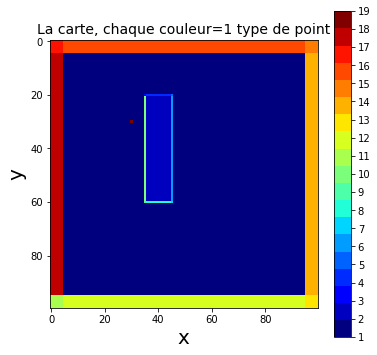

['PML', 'Eau', 'Bois', 'Frontières', 'Source']

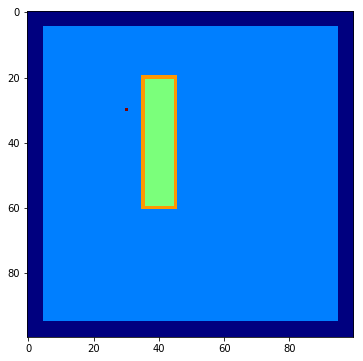

In [366]:
# Construction de la carte des noeuds 
Map=np.ones([Nx,Ny])
#Création de la map avec les points 
Map=Bois(Map, centre_bois_x, centre_bois_y, Nx_Bois, Ny_Bois)
Map=PML(Map,N_PML)
Map=Source(Map,S_x,S_y)

## Map Sans bois
MapSB=np.ones([Nx,Ny])
MapSB=PML(MapSB,N_PML)
MapSB=Source(MapSB,S_x,S_y)


Display_Map=np.copy(Map)
Display_Map[np.logical_and(Map>10,Map<19)]=0
Display_Map[np.logical_and(Map>2,Map<11)]=3
Display_Map[Map==19]=4
                           
cmap = plt.cm.get_cmap('jet', 19)
plt.figure(figsize=(6,6))
plt.imshow(np.transpose(Map), cmap=cmap)
cbar=plt.colorbar(ticks=np.arange(1,20),norm=np.arange(1,20))

plt.title("La carte, chaque couleur=1 type de point", fontsize=14)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()


fig,ax=plt.subplots(figsize=(6,6))
cmap = plt.cm.get_cmap('jet', 5)
plt.imshow(np.transpose(Display_Map), cmap=cmap)

["PML","Eau","Bois","Frontières","Source"]



# Construction de la matrice A:

In [367]:
## Paramètres des milieux: 

# Fréquence d'oscillation de la source
omega=1e3
#Intensité de la source (arbitraire)
p_source=1e2

#Eau
rho_eau=998.3
alpha_eau=1.18*0.0001
B_eau=2.15e9

#Bois
rho_bois=640.72
alpha_bois=3.2e-4 *0.01
B_bois=10e9

def p(i,j):
    """Le noeud (i,j) correspond à la ligne L de la matrice A"""
    # J'ai modifié pour tenir compte de la convention de Python:
    L=i+(j)*Nx
    return L
  
h=dx


In [368]:
# L'ordre des coefficients est toujours 
# [p(i-2,j),p(i-1,j) ,p(i,j-2),p(i,j-1),p(i,j),p(i+1,j),p(i+2,j),p(i,j+1),p(i,j+2)]

# Cas 1:
k2_eau=rho_eau*(omega**2/B_eau+2j*omega*alpha_eau)
Coeff1= [0,1,0,1,-(4-k2_eau*h**2),1,0,1,0]

# Cas 2:
k2_bois=rho_bois*(omega**2/B_bois+2j*omega*alpha_bois)
Coeff2= [0,1,0,1,-(4-k2_bois*h**2),1,0,1,0]


# Cas 3 à 10:
gamma_eau=rho_eau*(alpha_eau*B_eau+1j*omega)
gamma_bois=rho_bois*(alpha_bois*B_bois+1j*omega)
def Coeff_Frontiere(gamma1, gamma2,nx,ny):
    return [nx/gamma1,-4*nx/gamma1,ny/gamma1,-4*ny/gamma1,(nx+ny)*(gamma1+gamma2)/(gamma1+gamma2) \
            ,-4*nx/gamma2,nx/gamma2,-4*ny/gamma2,ny/gamma2] # Version avec gradient
#[nx/gamma1,-2*nx/gamma1,ny/gamma1,-2*ny/gamma1,(nx+ny)*gamma1*gamma2/(gamma1-gamma2),2*nx/gamma2,-nx/gamma2,2*ny/gamma2,-2*ny/gamma2]

Coeff3= Coeff_Frontiere(gamma_eau, gamma_bois,-1/np.sqrt(2),-1/np.sqrt(2))
Coeff4= Coeff_Frontiere(gamma_eau, gamma_bois,0,-1)
Coeff5= Coeff_Frontiere(gamma_bois,gamma_eau,1/np.sqrt(2),-1/np.sqrt(2))#-ny
Coeff6= Coeff_Frontiere(gamma_bois, gamma_eau,1,0)
Coeff7= Coeff_Frontiere(gamma_bois, gamma_eau,1/np.sqrt(2),1/np.sqrt(2))
Coeff8= Coeff_Frontiere(gamma_bois, gamma_eau,0,1)
Coeff9= Coeff_Frontiere(gamma_eau, gamma_bois,-1/np.sqrt(2),1/np.sqrt(2))
Coeff10= Coeff_Frontiere(gamma_eau, gamma_bois,-1,0)

# Cas 11 à 18 (PML): À compléter
def Coeff_PML(Type, i,j,h,Nx, Ny,k2_eau):
    k=np.sqrt(k2_eau)
    x=i*h+h/2
    y=j*h+h/2  # Pour éviter les divisions par 0 ?
    
    if Type==11:
        x0=0
        y0=h*Ny  # Ny ou Ny-1 ???
        Beta_x=1j/((x-x0)*(k*abs(x-x0)+1j))
        Beta_y=1j/((y-y0)*(k*abs(y-y0)+1j))
        Gamma_x=1+1j/k/(abs(x0-x))
        Gamma_y=1+1j/k/(abs(y0-y))
        Coeff=[0,0 ,1/Gamma_y**2,(-h*Beta_y-2)/Gamma_y**2,k**2*h**2+((1+h*Beta_y)/Gamma_y**2)+((1-h*Beta_x)/Gamma_x**2),\
               (h*Beta_x-2)/Gamma_x**2,1/Gamma_x**2,0,0]
    if Type==12:
        y0=h*Ny  # Ny ou Ny-1 ???
        Beta_y=1j/((y-y0)*(k*abs(y-y0)+1j))
        Gamma_y=1+1j/k/(abs(y0-y))
        Coeff=[0,1 ,1/Gamma_y**2,-(2+h*Beta_y)/Gamma_y**2,k**2*h**2+((1+h*Beta_y)/Gamma_y**2)-2,\
               1,0,0,0]
    
    if Type==13:
        x0=h*Nx  # Nx ou Nx-1 ???
        y0=h*Ny  # Ny ou Ny-1 ???
        Beta_x=1j/((x-x0)*(k*abs(x-x0)+1j))
        Beta_y=1j/((y-y0)*(k*abs(y-y0)+1j))
        Gamma_x=1+1j/k/(abs(x0-x))
        Gamma_y=1+1j/k/(abs(y0-y))
        Coeff=[1/Gamma_x**2,-(h*Beta_x+2)/Gamma_x**2,1/Gamma_y**2,-(h*Beta_y+2)/Gamma_y**2,\
               k**2*h**2+((1+h*Beta_y)/Gamma_y**2)+((1+h*Beta_x)/Gamma_x**2),0,0,0,0]
    if Type==14:
        x0=h*Nx  # Nx ou Nx-1 ??? 
        Beta_x=1j/((x-x0)*(k*abs(x-x0)+1j))
        Gamma_x=1+1j/k/(abs(x0-x))
        Coeff=[1/Gamma_x**2,-(h*Beta_x+2)/Gamma_x**2,0,1,\
               k**2*h**2-2+((1+h*Beta_x)/Gamma_x**2),0,0,1,0]
        
    if Type==15:
        x0=h*Nx  # Nx ou Nx-1 ???
        y0=0  
        Beta_x=1j/((x-x0)*(k*abs(x-x0)+1j))
        Beta_y=1j/((y-y0)*(k*abs(y-y0)+1j))
        Gamma_x=1+1j/k/(abs(x0-x))
        Gamma_y=1+1j/k/(abs(y0-y))
        Coeff=[-1/Gamma_x**2,-(h*Beta_x+2)/Gamma_x**2,0,0,\
               k**2*h**2+((1-h*Beta_y)/Gamma_y**2)+((1+h*Beta_x)/Gamma_x**2),0,0,(h*Beta_y-2)/Gamma_y**2,1/Gamma_y**2]
    if Type==16:
        y0=0  
        Beta_y=1j/((y-y0)*(k*abs(y-y0)+1j))
        Gamma_y=1+1j/k/(abs(y0-y))
        Coeff=[0,1,0,0,\
               k**2*h**2+((1+h*Beta_y)/Gamma_y**2)-2,1,0,(h*Beta_y-2)/Gamma_y**2,1/Gamma_y**2]
        
    if Type==17:
        x0=0
        y0=0
        Beta_x=1j/((x-x0)*(k*abs(x-x0)+1j))
        Beta_y=1j/((y-y0)*(k*abs(y-y0)+1j))
        Gamma_x=1+1j/k/(abs(x0-x))
        Gamma_y=1+1j/k/(abs(y0-y))
        Coeff=[0,0 ,0,0,k**2*h**2+((1-h*Beta_y)/Gamma_y**2)+((1-h*Beta_x)/Gamma_x**2),\
               (h*Beta_x-2)/Gamma_x**2,1/Gamma_x**2,(h*Beta_y-2)/Gamma_y**2,1/Gamma_y**2]
        
    if Type==18:
        x0=0
        Beta_x=1j/((x-x0)*(k*abs(x-x0)+1j))
        Gamma_x=1+1j/k/(abs(x0-x))
        Coeff=[0,0 ,0,1,k**2*h**2-2+((1-h*Beta_x)/Gamma_x**2),(h*Beta_x-2)/Gamma_x**2,1/Gamma_x**2,1,0]
    return Coeff
    
    
     

# Cas 19 (source): Option 2
Coeff19= [0,1,0,1,-(4-k2_eau*h**2),1,0,1,0]


Dict_Coeff={1:Coeff1, 2:Coeff2,3:Coeff3,4:Coeff4,5:Coeff5,6:Coeff6,7:Coeff7,8:Coeff8,9:Coeff9,10:Coeff10,19:Coeff19}

In [369]:
  
A=np.zeros([Nx*Ny,Nx*Ny], dtype=complex)
b=np.zeros([Nx*Ny],dtype=complex)

for i in range(Nx):
    for j in range(Ny): 
        L=p(i,j)
        
        Type=Map[i,j]
        if np.logical_and(Type>=11, Type<=18):
            Coefficient= Coeff_PML(Type,i,j,h,Nx,Ny,k2_eau)
        else:
            Coefficient=Dict_Coeff[Type]
        Position=[p(i-2,j),p(i-1,j),p(i,j-2),p(i,j-1),p(i,j),p(i+1,j),p(i+2,j),p(i,j+1),p(i,j+2)]
        for k,pos in enumerate(Position):
            if np.logical_and(pos>=0, pos<(Nx*Ny)):
                A[L,int(pos)]=Coefficient[k]
        if Type==19:
            b[L]=h**2*rho_eau*p_source
  

# Matrice sans bois 
A_SB=np.zeros([Nx*Ny,Nx*Ny], dtype=complex)

for i in range(Nx):
    for j in range(Ny): 
        L=p(i,j)
        
        Type=MapSB[i,j]
        if np.logical_and(Type>=11, Type<=18):
            Coefficient= Coeff_PML(Type,i,j,h,Nx,Ny,k2_eau)
        else:
            Coefficient=Dict_Coeff[Type]
        Position=[p(i-2,j),p(i-1,j),p(i,j-2),p(i,j-1),p(i,j),p(i+1,j),p(i+2,j),p(i,j+1),p(i,j+2)]
        for k,pos in enumerate(Position):
            if np.logical_and(pos>=0, pos<(Nx*Ny)):
                A_SB[L,int(pos)]=Coefficient[k]
#         if Type==19:
#             b[L]=h**2*rho_eau*p_source
  

In [370]:
t0=time.perf_counter() 
#sol=np.linalg.solve(A,b)
sol=scipy.sparse.linalg.spsolve(scipy.sparse.csc_matrix(A) ,b)
solSB=scipy.sparse.linalg.spsolve(scipy.sparse.csc_matrix(A_SB) ,b)
t=time.perf_counter()-t0
print("Temps pour inverser les deux matrices: {:.3f} s.".format(t))

MapSol=np.zeros([Nx,Ny],dtype=complex)
MapSolSB=np.zeros([Nx,Ny],dtype=complex)


Temps pour inverser les deux matrices: 7.508 s.


In [371]:
for i in range(Nx):
    for j in range(Ny):
        MapSol[i,j]=sol[int(p(i,j))]
        MapSolSB[i,j]=solSB[int(p(i,j))]

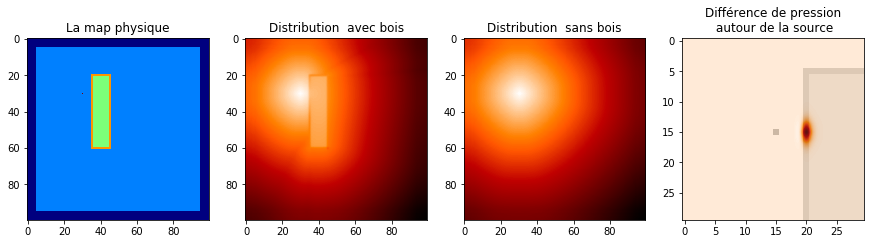

3.089284453313806e-06

In [372]:
fig,ax=plt.subplots(1,4,figsize=(15,5))
ax[1].imshow(np.transpose(np.log(abs(MapSol)+1e-300)),cmap="gist_heat",alpha=1,interpolation="gaussian" )
ax[0].imshow(np.transpose(Display_Map),alpha=1,cmap="jet")

ax[2].imshow(np.transpose(np.log(abs(MapSolSB)+1e-300)),alpha=1.0,cmap="gist_heat", interpolation="gaussian")
#ax[3].imshow(np.log(abs(MapSolSB)-abs(MapSol)+1e-300),alpha=1.0,cmap="coolwarm")
ax[0].set_title("La map physique")
ax[1].set_title("Distribution  avec bois")
ax[2].set_title("Distribution  sans bois")


#ax[3].imshow(np.transpose(np.log(abs(MapSol)+1e-300))-np.transpose(np.log(abs(MapSolSB)+1e-300)),cmap="gist_heat",alpha=1,interpolation="gaussian")


Diff=abs(MapSol)-abs(MapSolSB)
Diff=Diff[(S_x-15):(S_x+15),(S_y-15):(S_y+15) ]
Diff=Diff+2*abs(np.min(Diff))
Diff2=Display_Map[(S_x-15):(S_x+15),(S_y-15):(S_y+15) ]
Diff=np.log(Diff)

Cs=ax[3].imshow(np.transpose(Diff),cmap="gist_heat",alpha=1,interpolation="gaussian")
ax[3].imshow(np.transpose(Diff2),cmap="binary",alpha=0.2,interpolation="none")

ax[3].set_title("Différence de pression\n autour de la source")
#ax[3].imshow(np.transpose(np.log(abs(MapSol)-abs(MapSolSB)+1e-20)),cmap="gist_heat",alpha=1,interpolation="gaussian")
#fig.colorbar(Cs,ax=ax[3])
plt.show()

abs(MapSol[S_x+4,S_y+4])-abs(MapSolSB[S_x+4,S_y+4])

In [373]:
np.mean(Diff)

-5.369596050936262

-2.2324209743164246e-60

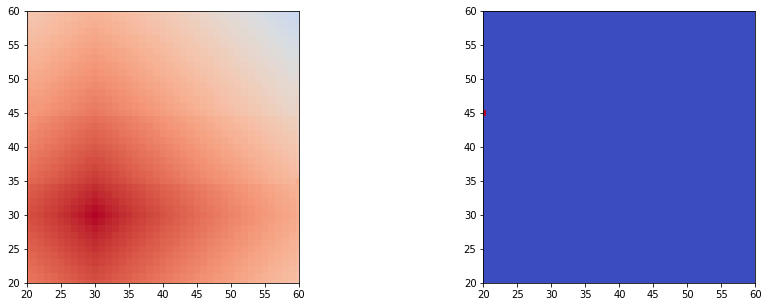

In [315]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(np.log(abs(MapSol)+1e-300),cmap="coolwarm",alpha=1,interpolation="none")
ax[0].set_xlim(20,60)
ax[0].set_ylim(20,60)

ax[1].imshow(abs(Map)==5,cmap="coolwarm",alpha=1)
ax[1].set_xlim(20,60)
ax[1].set_ylim(20,60)

abs(MapSol[45,37])-abs(MapSol[42,38])